<a href="https://colab.research.google.com/github/olwflynn/Learning/blob/master/Learning%20Physics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install -y \
    libgl1-mesa-dev \
    libgl1-mesa-glx \
    libglew-dev \
    libosmesa6-dev \
    software-properties-common

!apt-get install -y patchelf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1-mesa-dev is already the newest version (20.0.8-0ubuntu1~18.04.1).
libgl1-mesa-dev set to manually installed.
software-properties-common is already the newest version (0.96.24.32.18).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
Suggested packages:
  glew-utils
The following NEW packages will be installed:
  libgl1-mesa-glx libglew-dev libglew2.0 libosmesa6 libosmesa6-dev
0 upgraded, 5 newly installed, 0 to remove and 21 not upgraded.
Need to get 2,916 kB of archives.
After this operation, 12.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgl1-mesa-glx amd64 20.0.8-0ubuntu1~18.04.1 [5,532 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libglew2.0 amd64 2.0.0-5 [140 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/univ

In [2]:
!pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install free-mujoco-py mujoco

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 KB 18.3 MB/s eta 0:00:00


**Now you need to restart the runtime as numpy is apparently automatically imported...**

In [4]:
import mujoco_py
import gym

Compiling /usr/local/lib/python3.8/dist-packages/mujoco_py/cymj.pyx because it changed.
[1/1] Cythonizing /usr/local/lib/python3.8/dist-packages/mujoco_py/cymj.pyx
running build_ext
building 'mujoco_py.cymj' extension
creating /usr/local/lib/python3.8/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_38_linuxcpuextensionbuilder
creating /usr/local/lib/python3.8/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_38_linuxcpuextensionbuilder/temp.linux-x86_64-3.8
creating /usr/local/lib/python3.8/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_38_linuxcpuextensionbuilder/temp.linux-x86_64-3.8/usr
creating /usr/local/lib/python3.8/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_38_linuxcpuextensionbuilder/temp.linux-x86_64-3.8/usr/local
creating /usr/local/lib/python3.8/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_38_linuxcpuextensionbuilder/temp.linux-x86_64-3.8/usr/local/lib
creating /usr/local/lib/python3.8/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_38_linuxcpuexten

In [5]:
import numpy as np

# def plt_update(ax, colors=['b']):
#     x = np.linspace(0,1,100)
#     if ax.lines:
#         for line in ax.lines:
#             line.set_xdata(x)
#             y = np.random.random(size=(100,1))
#             line.set_ydata(y)
#     else:
#         for color in colors:
#             y = np.random.random(size=(100,1))
#             ax.plot(x, y, color)
#     fig.canvas.draw()


def live_plot(data_dict, figsize=(7,5), title=''):
    # clear_output(wait=True)
    plt.figure(figsize=figsize)
    # for label,data in data_dict.items():
    obs = data_dict["obs"]
    preds = data_dict["preds"]
    print("obs: ", obs, "\n preds: ",preds)

    plt.plot(obs, label="obs")
    plt.plot(range(len(obs)-1, len(obs)+len(preds)-1), preds, label="preds")
    
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

Need to restart runtime if cant find 'mujuco'

In [6]:
env = gym.make("InvertedDoublePendulum-v4", new_step_api=True)
env.reset(seed=42)
env.step(env.action_space.sample())

(array([ 0.06870061, -0.04281315,  0.09520997,  0.9990831 ,  0.99545721,
         0.46350651, -1.03696817,  1.08825815,  0.        ,  0.        ,
         0.        ]), 9.350741240124913, False, False, {})

In [7]:
# naive forecaster where we predict the angle at the next 3 steps is the same as the current angle

def naive_forecaster(X):
    # X is the all data known to the forecaster at the time. X is only the current and previous angles for now.
    
    current_angle = X[-1]
    angle_t_plus_1 = current_angle
    angle_t_plus_2 = current_angle
    angle_t_plus_3 = current_angle
    
    return np.array([angle_t_plus_1, angle_t_plus_2, angle_t_plus_3])


In [8]:
# get forecast error given a predicted trajectory and observations

def forecast_error(X_obs, preds):
    
    mse = sum(np.square(X_obs - preds)) / len(X_obs)
    
    return mse

epoch # 0
[ 0.04006459  0.00765888  0.02662316  0.99997067  0.99964554 -1.61195563
  3.08346201 -3.90383865  0.          0.          0.        ] 9.273657834757602 False False {}
obs:  [0.007658879355899941] 
 preds:  [0.00765888 0.20765888 0.20765888 0.20765888]


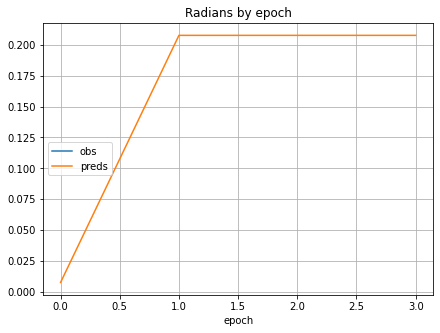

epoch # 1
[ 0.00804182  0.06349738 -0.04470559  0.99798201  0.99900021  0.32556825
 -0.80645175  0.95435922  0.          0.          0.        ] 9.352653510315319 False False {}
obs:  [0.007658879355899941, 0.06349737993960894] 
 preds:  [0.06349738 0.26349738 0.26349738 0.26349738]


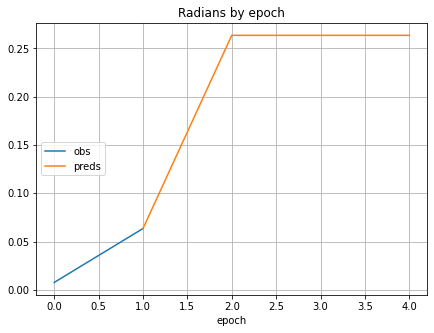

epoch # 2
[-7.39559879e-04  7.66464065e-02 -6.64965042e-02  9.97058337e-01
  9.97786658e-01 -6.76647055e-01  1.33320281e+00 -1.82461548e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00] 9.338673113534737 False False {}
obs:  [0.007658879355899941, 0.06349737993960894, 0.07664640646474072] 
 preds:  [0.07664641 0.27664641 0.27664641 0.27664641]


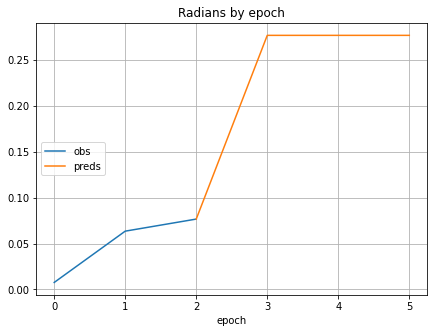

epoch # 3
[-0.00999776  0.09745683 -0.10491674  0.99523975  0.99448101  0.30400292
 -0.47739348  0.23094965  0.          0.          0.        ] 9.354880841281581 False False {}
obs:  [0.007658879355899941, 0.06349737993960894, 0.07664640646474072, 0.09745682705826787] 
 preds:  [0.09745683 0.29745683 0.29745683 0.29745683]


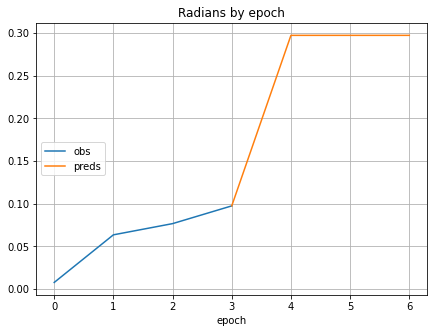

epoch # 4
[-0.03855145  0.16552019 -0.21130692  0.9862064   0.97741976 -1.4407386
  3.19446381 -4.45256517  0.          0.          0.        ] 9.236296604878072 False False {}
obs:  [0.007658879355899941, 0.06349737993960894, 0.07664640646474072, 0.09745682705826787, 0.1655201924264] 
 preds:  [0.16552019 0.36552019 0.36552019 0.36552019]


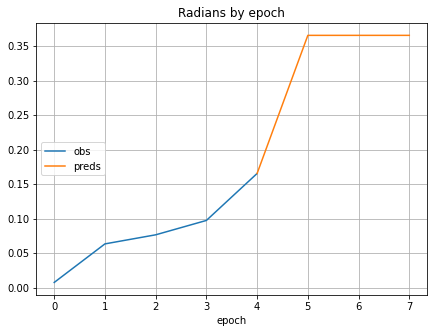

epoch # 5
[-0.10994785  0.32475262 -0.4298166   0.94579899  0.90291621 -1.416004
  3.41051251 -4.83743064  0.          0.          0.        ] 9.17182280428895 False False {}
obs:  [0.007658879355899941, 0.06349737993960894, 0.07664640646474072, 0.09745682705826787, 0.1655201924264, 0.324752620798032] 
 preds:  [0.32475262 0.52475262 0.52475262 0.52475262]


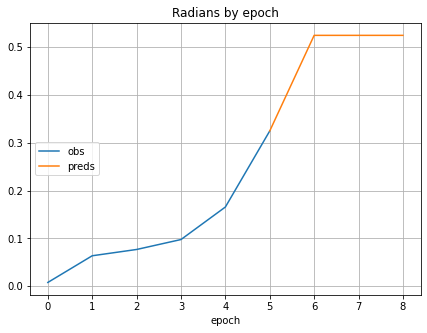

epoch # 6
[-0.1782011   0.48485276 -0.64091174  0.87459579  0.76761458 -1.31347165
  3.62552111 -5.22635221  0.          0.          0.        ] 9.065316361591162 False False {}
obs:  [0.007658879355899941, 0.06349737993960894, 0.07664640646474072, 0.09745682705826787, 0.1655201924264, 0.324752620798032, 0.48485276249914105] 
 preds:  [0.48485276 0.68485276 0.68485276 0.68485276]


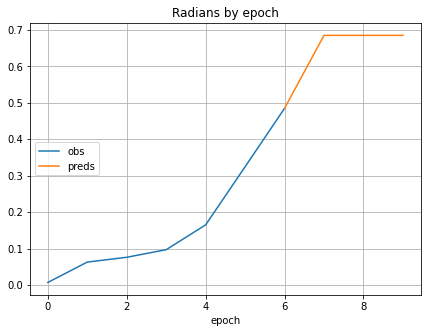

epoch # 7
[-0.2871676   0.68289002 -0.82192223  0.73052119  0.56959973 -3.00159069
  6.01600311 -4.92833753  0.          0.          0.        ] 8.891293894400171 False False {}
obs:  [0.007658879355899941, 0.06349737993960894, 0.07664640646474072, 0.09745682705826787, 0.1655201924264, 0.324752620798032, 0.48485276249914105, 0.6828900238092759] 
 preds:  [0.68289002 0.88289002 0.88289002 0.88289002]


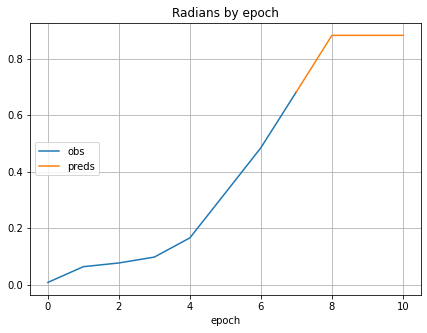

epoch # 8
[-0.41646534  0.86338492 -0.92970861  0.50454581  0.36829595 -2.17642049
  5.69628322 -4.38602253  0.          0.          0.        ] 8.652170703267133 True False {}
obs:  [0.007658879355899941, 0.06349737993960894, 0.07664640646474072, 0.09745682705826787, 0.1655201924264, 0.324752620798032, 0.48485276249914105, 0.6828900238092759, 0.863384923600409] 
 preds:  [0.86338492 1.06338492 1.06338492 1.06338492]


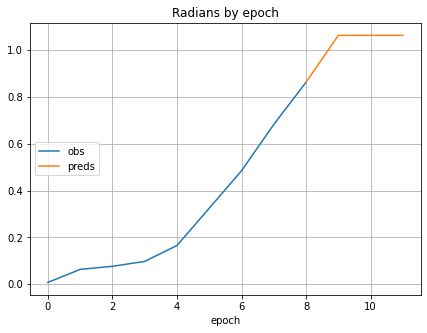

[0.007658879355899941, 0.06349737993960894, 0.07664640646474072, 0.09745682705826787, 0.1655201924264, 0.324752620798032, 0.48485276249914105, 0.6828900238092759, 0.863384923600409]
Prediction error in last 3 steps:  0.17315861006518926


In [9]:
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt

# observation, info = env.reset(seed=42)
obs_history = []
# fig,ax = plt.subplots(1,1)
# ax.set_xlabel('t')
# ax.set_ylabel('obs_idx_1')
# ax.set_xlim(0,20)
# ax.set_ylim(-5,5)

for _ in range(10):
    print("epoch #", _)
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
    print(observation, reward, terminated, truncated, info)
    obs_history.append(observation[1])
    # plt.plot(obs_history[0][0])
    # plt.show()
    preds = obs_history[-1]+[0, 0.2,0.2,0.2]
    # obs_concat_preds = obs_history
    # for pred in preds:
    #     obs_concat_preds.append(pred)
    live_plot({"obs": obs_history, "preds": preds}, title="Radians by epoch")
    time.sleep(1)
    if terminated or truncated:
        print(obs_history)
        print("Prediction error in last 3 steps: ", forecast_error(obs_history[-3:], preds[-3:]))
        break
        # obs_history = []
        # observation, info = env.reset()

env.close()

The episode ends when any of the following happens:

Truncation: The episode duration reaches 1000 timesteps.

Termination: Any of the state space values is no longer finite.

Termination: The absolutely value of the vertical angle between the pole and the cart is greater than 0.2 radian. i.e. 11.4592 degrees

1; vertical angle of the pole on the cart; -Inf; Inf; angle (rad)

*JTBD*

- Run thousands of episodes to generate training data with features (current and prev angles and other data) and labels (next few angles)
- Train forecast model to predict trajectory of angle
- Start episode with control over speed i.e. time lag between steps
- Predict expected time to end of episode at step t with measure of uncertainty
- Predict trajectory of angle in next few time steps at step t
- At end of episode output prediction errors at a few time steps


In [10]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import torch
X = torch.randn(1, 15)
print(X)

tensor([[-0.1514, -1.2239,  1.4934, -1.8379,  1.7719,  0.4900,  0.7124,  1.3291,
          0.0039,  0.9831, -1.6224, -1.3179,  0.5245,  0.8600, -0.0962]])


In [12]:
y = torch.ones(1, 10)
print(y)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


In [13]:
# y = softmax(layer2(layer1(X)))

from torch import nn

class TestNetwork(nn.Module):
  def __init__(self):
    super(TestNetwork, self).__init__()
    self.seqlayers = nn.Sequential(
        nn.Linear(15, 20),
        nn.ReLU(),
        nn.Linear(20, 10),
        nn.ReLU(),
    )
    self.softmax = nn.Softmax(dim=1)

  def forward(self, X):
    hidden1 = self.seqlayers(X)
    output = self.softmax(hidden1)
    return output



In [14]:
model = TestNetwork()
print(model)

TestNetwork(
  (seqlayers): Sequential(
    (0): Linear(in_features=15, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=10, bias=True)
    (3): ReLU()
  )
  (softmax): Softmax(dim=1)
)


In [15]:
preds = model(X)
preds

tensor([[0.1103, 0.0911, 0.0738, 0.1171, 0.1312, 0.1082, 0.0738, 0.0791, 0.1148,
         0.1005]], grad_fn=<SoftmaxBackward0>)

In [16]:
preds.size()

torch.Size([1, 10])

In [17]:
loss_ = torch.nn.functional.binary_cross_entropy(preds, y)
loss_

tensor(2.3211, grad_fn=<BinaryCrossEntropyBackward0>)

In [18]:
# Backpropagation for one step
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

optimizer.zero_grad()
loss_.backward()
optimizer.step()

new_preds = model(X)
new_loss = torch.nn.functional.binary_cross_entropy(new_preds, y)

print(new_loss)

tensor(2.3189, grad_fn=<BinaryCrossEntropyBackward0>)


In [19]:
def create_rows_for_episode(ep_num):
  env.reset(seed=42)
  for _ in range(100):
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
    features = np.array(observation[:8]).reshape(1, 8)
    if _ == 0:
      rows_for_ep = features
    else:
      rows_for_ep = np.concatenate((rows_for_ep, features), axis=0)
    if terminated or truncated:
      labels = np.array(range(_, -1,-1)).reshape(_+1, 1)
      ep_num_arr = np.array([ep_num for i in range(len(labels))]).reshape(_+1, 1)
      assert len(labels) == len(rows_for_ep)
      rows_for_ep = np.concatenate((rows_for_ep, labels), axis=1)
      rows_for_ep = np.concatenate((rows_for_ep, ep_num_arr), axis=1)
      # print(len(rows_for_ep), type(rows_for_ep))
      return rows_for_ep
  
    

In [20]:
# create a dataset with positions of the pendulum as features and time to terminate as label

import pandas as pd

columns = []
for i in range(8):
  columns.append(f'feature_{i}')
columns.append('time_to_terminate')
columns.append('ep_num')

#create array
num_episodes = 10000
for j in range(num_episodes):
  episode_rows = create_rows_for_episode(j)
  if j == 0:
    arr = episode_rows
  else:
    arr = np.concatenate([arr, episode_rows], axis=0)
env.close()

df = pd.DataFrame(arr, columns=columns)
print(df.head())
print(df.describe())
print(df.info())

   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.075801  -0.057330   0.113376   0.998355   0.993552   0.747716   
1   0.126741  -0.168810   0.245464   0.985649   0.969406   1.289914   
2   0.156512  -0.254156   0.365291   0.967163   0.930893  -0.086805   
3   0.134695  -0.270176   0.445150   0.962811   0.895456  -0.785373   
4   0.067665  -0.232835   0.513079   0.972516   0.858341  -1.901470   

   feature_6  feature_7  time_to_terminate  ep_num  
0  -1.620037   1.819608                8.0     0.0  
1  -2.879671   3.553874                7.0     0.0  
2  -0.708112   1.724377                6.0     0.0  
3   0.034924   1.810232                5.0     0.0  
4   1.543794   1.229662                4.0     0.0  
          feature_0     feature_1     feature_2     feature_3     feature_4  \
count  63666.000000  63666.000000  63666.000000  63666.000000  63666.000000   
mean       0.056943     -0.042613      0.078471      0.886776      0.819415   
std        0.22644

In [21]:
# terminating conditions of the episodes

df_terminated = df[df['time_to_terminate']==0]
print(df_terminated.head())
print(df_terminated.describe())
print(df_terminated.info())

    feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
8   -0.455108   0.301929   0.649349   0.953330   0.760491  -3.041690   
13  -0.450777   0.819676  -0.806697   0.572827   0.590965  -4.291635   
19  -0.392419   0.870543  -0.955114   0.492092   0.296238  -1.869417   
23  -0.474936   0.832723  -0.792623   0.553690   0.609711  -4.311210   
27  -0.492059   0.844797  -0.791137   0.535087   0.611638  -4.303746   

    feature_6  feature_7  time_to_terminate  ep_num  
8    3.964113  -0.328407                0.0     0.0  
13   7.177317  -2.772604                0.0     1.0  
19   5.299377  -4.625726                0.0     2.0  
23   7.341728  -2.942574                0.0     3.0  
27   7.469521  -2.992593                0.0     4.0  
          feature_0     feature_1     feature_2     feature_3     feature_4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.067986     -0.083664      0.110270      0.626096      0.467966   
std   

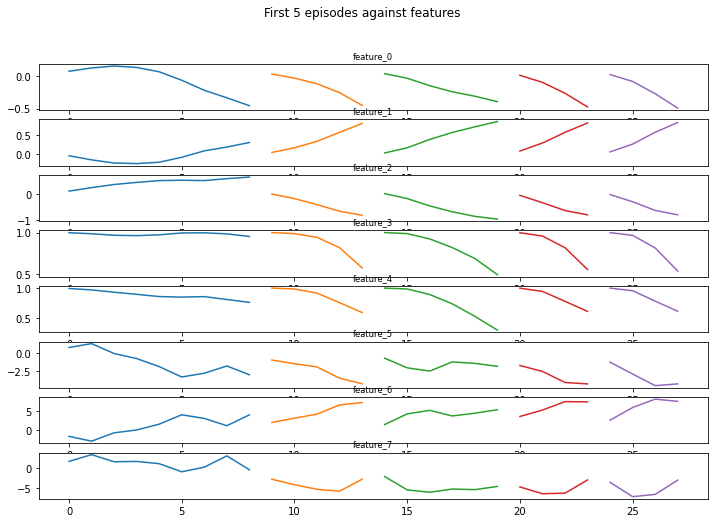

In [22]:
# plot a five of the episodes against various features

ep_split_df = [df[df['ep_num']==i] for i in range(5)]
num_features = 8
fig, axs = plt.subplots(num_features, figsize=(12, 8))
plt.suptitle('First 5 episodes against features')
for i in range(num_features):
  for el in ep_split_df:
    ep = el['ep_num'].values[0]
    axs[i].plot(el[f'feature_{i}'], label=f'episode_{int(ep)}')
    axs[i].set_title(f'feature_{i}', fontsize='small')
# plt.legend(loc='right')
plt.show()

In [23]:
from random import triangular
# prepare dataset for train, validate, test
# use final 20% episodes for testing

test_size = 0.2*num_episodes

test_df = df[df['ep_num']<=test_size]
train_df = df[df['ep_num']>test_size]

features = []
for i in range(8):
  features.append(f'feature_{i}')

test_labels = test_df['time_to_terminate']
test_features = test_df[features]

train_labels = train_df['time_to_terminate']
train_features = train_df[features]

print('Test dataset shapes:', test_labels.shape, test_features.shape)
print('Train dataset shapes:', train_labels.shape, train_features.shape)

Test dataset shapes: (12677,) (12677, 8)
Train dataset shapes: (50989,) (50989, 8)


In [24]:
# linear regression model to predict time_to_terminate using features as baseline
# this model does not take into account the time series i.e. it assumes that t, t+1 are independent

from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(train_features, train_labels)

preds = regr.predict(test_features)

print('MSE: \n', forecast_error(test_labels, preds))
print('Score: \n', regr.score(test_features, test_labels))

MSE: 
 2.192567743695222
Score: 
 0.6020273794505684


In [25]:
print(regr.coef_)
print(regr.intercept_)

[ 7.79679300e+00  6.90380173e+00  2.66616911e+00  5.07305108e+00
  5.26486320e+00 -1.93269233e-01 -7.71255485e-02 -3.00148994e-03]
-6.216255558853751


Results:

> n=100, mse=2.07, model=lin reg
coef= [ 1.33349380e+00 -6.43072005e-01 -1.25702564e+00  6.48821446e+00
  5.30884445e+00 -1.92036934e-01 -8.90950510e-02 -3.15731262e-03]
intercept= -7.1225544550046775



> n=10000, mse=2.07, model=lin reg
coef=[ 8.05432692  6.7247005   2.55556171  4.98903376  5.38681353 -0.09618963
  0.021658    0.03276889]
intercept=-6.228216297398191





In [26]:
# log linear so only positve? 
# look at gamma regression to use linear regression and only predict positive values

from sklearn.linear_model import PoissonRegressor

pois_regr = PoissonRegressor()

pois_regr.fit(train_features, train_labels)

pois_preds = pois_regr.predict(test_features)
print('Poisson model')
print('MSE: \n', forecast_error(test_labels, pois_preds))
print('Score: \n', pois_regr.score(test_features, test_labels))

Poisson model
MSE: 
 4.624125806092908
Score: 
 0.14978900003789875


In [27]:
from sklearn.linear_model import TweedieRegressor

tweed_regr = TweedieRegressor(power=1.5)

tweed_regr.fit(train_features, train_labels)

tweed_preds = tweed_regr.predict(test_features)
print('Tweedie w/ power=1.5')
print('MSE: \n', forecast_error(test_labels, tweed_preds))
print('Score: \n', tweed_regr.score(test_features, test_labels))

Tweedie w/ power=1.5
MSE: 
 4.941678266470815
Score: 
 0.06987990671266442


In [28]:
# take linear model but set preds less than zero to 0.
preds_positive = preds.copy()
preds_positive[preds_positive < 0] =  0

print('Positive only predictions linear model')
print('MSE: \n', forecast_error(test_labels, preds_positive))


Positive only predictions linear model
MSE: 
 2.077998115841308


In [46]:
# wants to learn the x^2 features so linear is a bad model e.g. direction (+/-) does not matter for falling for pendulum
# implement NN to add non-linearity - use softplus for output



class DenseNet(nn.Module):
  def __init__(self):
    super(DenseNet, self).__init__()
    self.layer1 = nn.Linear(8,20)
    self.layer2 = nn.Linear(20,1)
    self.softplus = nn.Softplus()
  
  def forward(self, X):
    hidden1 = self.layer1(X)
    hidden2 = self.layer2(hidden1)

    output = self.softplus(hidden2)
    return output

In [64]:
dense_model = DenseNet()
print(dense_model)
X_sample = torch.tensor(sample_feat.values)
y_sample = torch.tensor(sample_lab.values)

#transform to float.32
X_sample = X_sample.to(torch.float32)
print(X_sample.shape, X_sample.dtype)
dense_model(X_sample)

DenseNet(
  (layer1): Linear(in_features=8, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=1, bias=True)
  (softplus): Softplus(beta=1, threshold=20)
)
torch.Size([1, 8]) torch.float32


tensor([[1.8771]], grad_fn=<SoftplusBackward0>)

In [108]:
from sklearn.metrics import log_loss
# Training loop

def train(y_, X_, model_, epochs=10000, learning_rate=0.1):
  criterion = nn.MSELoss()
  optimizer = torch.optim.SGD(model_.parameters(), lr=learning_rate)

  for epoch in range(epochs):
    optimizer.zero_grad()

    preds = model_(X_)
    loss = torch.sqrt(criterion(preds, y_))
    if epoch % 500 == 0:
      print(f'epoch #{epoch} loss: \n', loss.item())
    loss.backward()
    optimizer.step()

  print('Final loss: \n', loss.item())


In [84]:
train(train_labels_tensor, train_features_tensor, dense_model, epochs=1000)

epoch #0 loss: 
 1.3395487070083618
epoch #100 loss: 
 1.3389513492584229
epoch #200 loss: 
 1.338364601135254
epoch #300 loss: 
 1.3377890586853027
epoch #400 loss: 
 1.3372238874435425
epoch #500 loss: 
 1.3366695642471313
epoch #600 loss: 
 1.336125135421753
epoch #700 loss: 
 1.3355909585952759
epoch #800 loss: 
 1.3350664377212524
epoch #900 loss: 
 1.3345513343811035
Final loss: 
 1.3438174724578857


In [103]:
# next add reLU for additional non-linearity

class DenseNetRelu(nn.Module):
  def __init__(self):
    super(DenseNetRelu, self).__init__()
    self.layer1 = nn.Linear(8,20)
    self.relu1 = nn.ReLU()
    self.layer2 = nn.Linear(20,1)
    self.relu2 = nn.ReLU()
    self.softplus = nn.Softplus()
  
  def forward(self, X):
    hidden1 = self.relu1(self.layer1(X))
    hidden2 = self.relu2(self.layer2(hidden1))

    output = self.softplus(hidden2)
    return output

In [104]:
dense_plus_relu_model = DenseNetRelu()
print(dense_plus_relu_model)

DenseNetRelu(
  (layer1): Linear(in_features=8, out_features=20, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=20, out_features=1, bias=True)
  (relu2): ReLU()
  (softplus): Softplus(beta=1, threshold=20)
)


In [109]:
train(train_labels_tensor, train_features_tensor, dense_plus_relu_model)

epoch #0 loss: 
 1.1787439584732056
epoch #500 loss: 
 1.1178183555603027
epoch #1000 loss: 
 1.1159192323684692
epoch #1500 loss: 
 1.106859564781189
epoch #2000 loss: 
 1.0983161926269531
epoch #2500 loss: 
 1.1193236112594604
epoch #3000 loss: 
 1.0950719118118286
epoch #3500 loss: 
 1.0880285501480103
epoch #4000 loss: 
 1.0850255489349365
epoch #4500 loss: 
 1.089189052581787
epoch #5000 loss: 
 1.0803968906402588
epoch #5500 loss: 
 1.0822069644927979
epoch #6000 loss: 
 1.083616018295288
epoch #6500 loss: 
 1.081641674041748
epoch #7000 loss: 
 1.0782501697540283
epoch #7500 loss: 
 1.0804098844528198
epoch #8000 loss: 
 1.0805439949035645
epoch #8500 loss: 
 1.077345371246338
epoch #9000 loss: 
 1.078823208808899
epoch #9500 loss: 
 1.0772886276245117
Final loss: 
 1.0766116380691528


In [120]:
sample = df.sample()
sample_feat = sample[features]
sample_lab = sample['time_to_terminate']
print('Linear model: ',regr.predict(sample_feat)[0])
print('Poisson model: ', pois_regr.predict(sample_feat)[0])
print('DenseNet model: ', dense_model(torch.tensor(sample_feat.values, dtype=dtype, device=device)).item())
print('DenseNetRelu model: ', dense_plus_relu_model(torch.tensor(sample_feat.values, dtype=dtype, device=device)).item())
print('Actual:  ', sample_lab.values[0])

Linear model:  4.6350984377698765
Poisson model:  3.258579524341748
DenseNet model:  5.121188163757324
DenseNetRelu model:  6.119725704193115
Actual:   6.0


In [ ]:
# try lstm to enable dependency between t, t+1 but only within the same episode
# train on gpu

